In [22]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import hvplot.networkx as hvnx
import bokeh
import holoviews as hv
from bokeh.core.enums import MarkerType
from bokeh.plotting import figure, show

In [23]:
attr_list = pd.read_csv('data/attr_list_salt.csv')
edge_list = pd.read_csv('data/edge_list_salt.csv')

In [24]:
attr_list = attr_list.loc[:,['ID', 'node_type', 'temporal_seq_rank', 'year']]
edge_list = edge_list.loc[:,['from', 'to']]

In [25]:
attr_list.head(5)

,ID,node_type,temporal_seq_rank,year
0,1,Systematic Review Report,21.0,2002
1,2,Systematic Review Report,21.0,2003
2,3,Systematic Review Report,21.0,2004
3,4,Systematic Review Report,41.0,2009
4,5,Systematic Review Report,51.0,2011


In [26]:
# convert attr_list into a dictionary
attr_dict_temp = attr_list.to_dict(orient='records')

# shape the dict to fit the input of networx
attr_dict = [(x['ID'], x) for x in attr_dict_temp]

In [27]:
edge_list.head()

,from,to
0,1,26
1,1,42
2,1,38
3,1,32
4,1,29


In [28]:
# create the color attribute in the network object

node_color = []
node_shape = []

# adding one more item in attr_dict about color of fill and edge
for x in attr_dict:
    if x[1]['node_type'] == 'Systematic Review Report':
        node_color.append('steelblue')
        node_shape.append('square')
    elif x[1]['node_type'] == 'Primary Study Report':
        node_color.append('grey')
        node_shape.append('circle')

In [29]:
seed = 42
G = nx.Graph()
G.add_nodes_from(attr_dict)
G.add_edges_from([(x, y) for x, y in zip(edge_list['from'].to_list(), edge_list['to'].to_list())])
pos = nx.spring_layout(G, seed=seed)
hvnx.draw(G, pos=pos, width=800, height=600, node_color=node_color, with_labels=True)

:Overlay
   .Graph.I  :Graph   [start,end]
   .Labels.I :Labels   [x,y]   (index)

In [30]:
seed = 42
# necessary for plotting the next figure
G = nx.DiGraph()
G.add_nodes_from(attr_dict)
G.add_edges_from([(x, y) for x, y in zip(edge_list['from'].to_list(), edge_list['to'].to_list())])

In [31]:
attr_list['inclusion_number'] = [x[1] for x in list(G.in_degree())]

In [32]:
attr_list.head()

,ID,node_type,temporal_seq_rank,year,inclusion_number
0,1,Systematic Review Report,21.0,2002,0
1,2,Systematic Review Report,21.0,2003,0
2,3,Systematic Review Report,21.0,2004,0
3,4,Systematic Review Report,41.0,2009,0
4,5,Systematic Review Report,51.0,2011,0


In [33]:
attr_list_psr = attr_list.loc[14:, ]
attr_list_psr.head()

,ID,node_type,temporal_seq_rank,year,inclusion_number
14,26,Primary Study Report,1.0,1978,8
15,27,Primary Study Report,2.0,1985,4
16,28,Primary Study Report,3.0,1987,0
17,29,Primary Study Report,4.0,1990,8
18,30,Primary Study Report,6.0,1992,1


In [34]:
# compute PSR-UR
attr_list_psr.head()

,ID,node_type,temporal_seq_rank,year,inclusion_number
14,26,Primary Study Report,1.0,1978,8
15,27,Primary Study Report,2.0,1985,4
16,28,Primary Study Report,3.0,1987,0
17,29,Primary Study Report,4.0,1990,8
18,30,Primary Study Report,6.0,1992,1


In [35]:
srr_rank = attr_list.loc[:13, 'temporal_seq_rank'].to_list()
srr_rank

[21.0,
 21.0,
 21.0,
 41.0,
 51.0,
 39.5,
 63.0,
 59.5,
 59.5,
 64.0,
 70.0,
 72.0,
 73.0,
 74.0]

In [36]:
avail_no_of_srr_list = [sum([x < y for y in srr_rank]) for x in attr_list_psr['temporal_seq_rank'].to_list()]
inclusion_number_list = attr_list_psr['inclusion_number'].to_list()

In [37]:
my_lambda = lambda x, y: round(x/y,2) if y !=0 else None

In [38]:
psr_ur_list = [my_lambda(x,y) for x, y in zip(inclusion_number_list, avail_no_of_srr_list)]

In [39]:
pub_year_list = attr_list_psr['year'].to_list()

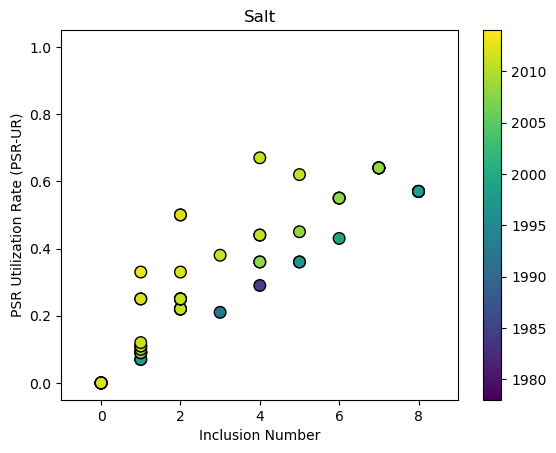

In [43]:
plt.scatter(inclusion_number_list, psr_ur_list, c=pub_year_list, edgecolor='black', s=70)
plt.xlabel("Inclusion Number")
plt.ylabel("PSR Utilization Rate (PSR-UR)")
plt.xlim(-1, 9)
plt.ylim(-0.05, 1.05)
plt.colorbar()
plt.title("Salt")
plt.show()

In [42]:
plt.scatter(inclusion_number_list, psr_ur_list, c=pub_year_list, edgecolor='black', s=70)
plt.xlabel("Inclusion Number", fontsize=12,fontweight="bold")
plt.ylabel("PSR Utilization Rate (PSR-UR)", fontsize=12,fontweight="bold")
plt.xlim(-1, 9)
plt.ylim(-0.05, 1.05)
plt.colorbar()
plt.title("Salt", fontsize=15,fontweight="bold")
# plt.show()
plt.gcf().set_size_inches(6,5)
plt.savefig("Salt.png", dpi=300)
plt.close()